Load the preprocessed data(new.csv)

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [14]:
data = np.genfromtxt('new.csv',delimiter=",",skiprows=1)

In [31]:
import time
start = time.time()

X=data[:,0:5]
y=data[:,5]
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
print model.score(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
# predict class labels for the test set
predicted = model2.predict(X_test)

end = time.time()
elapsed = end - start
print elapsed

0.91963522371
0.115572929382


In [16]:
y.mean()

0.080535765175263604

In [17]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [18]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print predicted

[ 0.  0.  0. ...,  0.  0.  0.]


In [19]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print probs

[[ 0.93894622  0.06105378]
 [ 0.81876131  0.18123869]
 [ 0.89134797  0.10865203]
 ..., 
 [ 0.98210481  0.01789519]
 [ 0.97348928  0.02651072]
 [ 0.97171314  0.02828686]]


In [20]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)


0.920022796353


In [21]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[4830   14]
 [ 407   13]]
             precision    recall  f1-score   support

        0.0       0.92      1.00      0.96      4844
        1.0       0.48      0.03      0.06       420

avg / total       0.89      0.92      0.89      5264



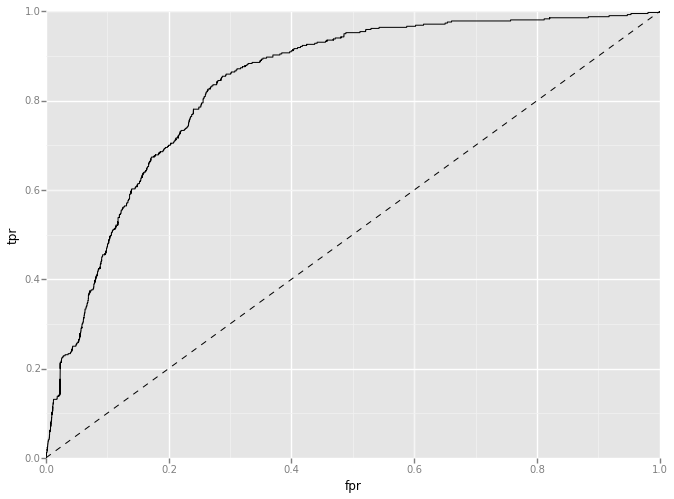

<ggplot: (281396441)>

In [22]:
from sklearn import metrics
import pandas as pd
from ggplot import *

fpr, tpr, _ = metrics.roc_curve(y_test, probs[:,1])

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

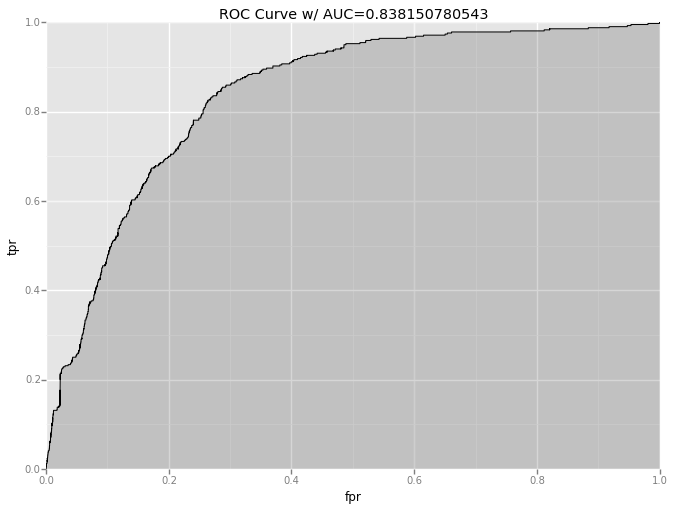

<ggplot: (282610029)>

In [30]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', ymin=0, ymax='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

In [23]:
print metrics.roc_auc_score(y_test, probs[:, 1])

0.838150780543


In [24]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.75284738  0.92596811  0.91965812  0.91961231  0.93101482  0.91505131
  0.91847206  0.92303307  0.91733181  0.90649943]
0.902948843267


Feature analysis by coefficient

In [25]:
occ_index = np.nonzero(y)
un_index = np.delete(np.array(range(0,17545)),occ_index)

In [26]:
print model.coef_

[[-0.02113203  0.05050764 -1.08157727  0.00188523  1.00137665]]


In [27]:
y[occ_index]

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

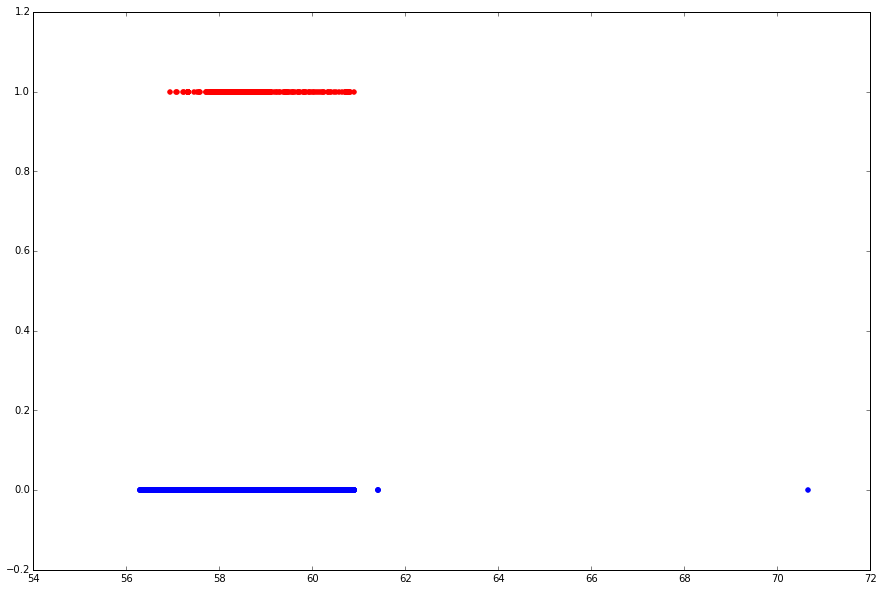

In [28]:
plt.figure(figsize=(15,10))
plt.scatter(X[occ_index,2],y[occ_index],color='r')
plt.scatter(X[un_index,2],y[un_index],color='b')

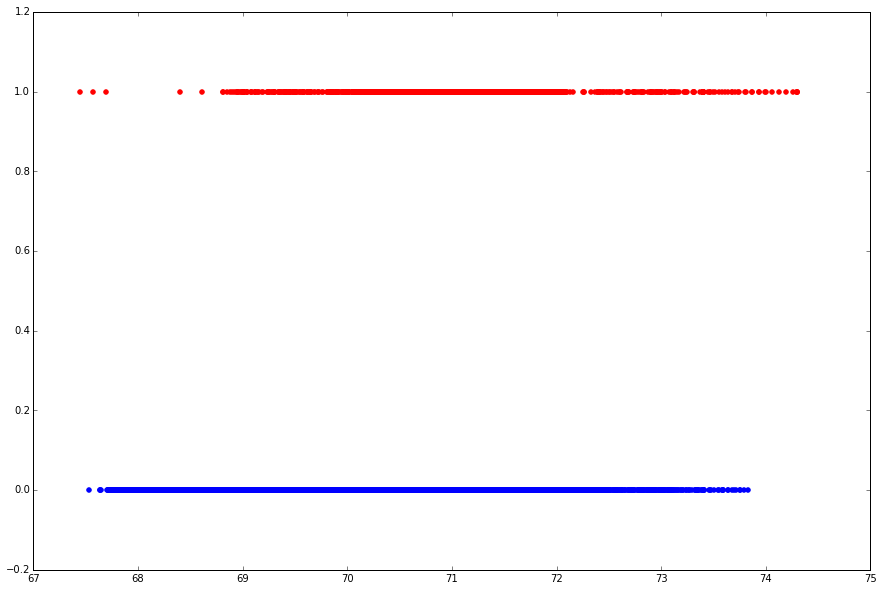

In [29]:
plt.figure(figsize=(15,10))
plt.scatter(X[occ_index,4],y[occ_index],color='r')
plt.scatter(X[un_index,4],y[un_index],color='b')